## NOTEBOOK DESCRIPTION:

This notebook checks the behaviour of the embedding space: 
- It first checks manually the nearest neighbors of some selected channels
- It also compute the user jumper score which is a first barrier on the evaluation of the embedding

In [1]:
import pickle
import os
import sys
import random
#import torch

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *

### Create embedding from torch 

In [2]:
#model_path = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/CONTEXT_True_20_SUBSAMPLING_True_0.0043/models/model0.pth'
#df = create_dataframe_in_embedding_space(model_path)

In [3]:
#df.shape

In [4]:
#df.to_csv('/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/CONTEXT_True_20_SUBSAMPLING_True_0.0043/models/embedding0.csv.gz', compression='gzip', index = False)


### Useful functions

In [7]:
# Selected channels and id-index mapping
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

In [8]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/CONTEXT_True_20_SUBSAMPLING_False_0.0043/models/embedding0.csv.gz'

In [9]:
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [10]:
channelcrawler.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


In [19]:
channelcrawler['category_cc'].unique()

array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

### Manually check the neirest neighbors of some selected channels

First to check how good is the embedding space, we are going to choose a channel and it's k closest channels in the embedding space. By looking at these channels in the YouTube website, we have a sense of how good/bad is the embedding.

In [20]:
# Looking at the neirest neigbors of `Shaaanxo` being a girl fashion channel
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCMpOz2KEfkSdd5JeIJh_fxw,Howto & Style,2009-01-18,Shaaanxo,3215340,1422,3566.0,2.2780
1,UCbO9bltbkYwa56nZFQx6XJg,Howto & Style,2014-07-17,Manny Mua,4800000,426,1910.0,2.0870
2,UCzTKskwIc_-a0cGvCXA848Q,Howto & Style,2008-06-23,NikkieTutorials,12269235,742,312.0,2.0870
3,UCkvK_5omS-42Ovgah8KRKtg,Howto & Style,2006-02-14,jeffreestar,16000000,357,222.0,2.0870
4,UC21yq4sq8uxTcfgIxxyE9VQ,Howto & Style,2011-06-27,Carli Bybel,6190000,546,1234.0,2.0870
5,UCGwPbAQdGA3_88WBuGtg9tw,Howto & Style,2010-12-03,grav3yardgirl,8560000,1536,725.0,2.0870
6,UCF2oW5-MO8dB6ul9WH9xi0A,People & Blogs,2007-01-04,blndsundoll4mj,4900000,2420,1808.0,2.0870
7,UCKMugoa0uHpjUuq14yOpagw,Howto & Style,2009-06-09,Laura Lee,4400000,638,2083.0,2.1200
8,UCc6W7efUSkd9YYoxOnctlFg,Entertainment,2009-06-08,Bethany Mota,10200000,483,545.0,2.0870
9,UC8v4vz_n2rys6Yxpj8LuOBA,Howto & Style,2013-01-26,KathleenLights,4140000,979,2308.0,2.1680


In [9]:
# Looking at the neirest neigbors of `Alex Costa` being a men fashion channel
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCZyCposXwcyopaACep44maQ'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCZyCposXwcyopaACep44maQ,Howto & Style,2011-09-29,Alex Costa,2120000,543,5370.0,2.4170
1,UChNN7VBxPTiNrqjUaQd9bxA,Howto & Style,2012-09-14,Teachingmensfashion,4210000,1160,2093.0,2.1225
2,UC1KbedtKa3d5dleFR6OjQMg,Howto & Style,2008-07-06,alpha m.,5360000,1116,1376.0,2.0870
3,UCBdw4dLCLLHmTgAOnW4V0hQ,Entertainment,2005-11-24,The Rock,4470000,193,1879.0,2.0870
4,UCj34AOIMl_k1fF7hcBkD_dw,Science & Technology,2009-01-27,EverythingApplePro,7630000,1639,826.0,2.0870
5,UC_hoQDD6zKcIqpIYLsFbBeA,People & Blogs,2013-09-22,Mo Vlogs,8280000,1500,693.0,2.0870
6,UC7eHZXheF8nVOfwB2PEslMw,Comedy,2009-07-06,ashish chanchlani vi...,14200000,130,218.0,2.0870
7,UCyEd6QBSgat5kkC6svyjudA,Travel & Events,2009-02-02,Mark Wiens,4900000,993,1493.0,2.0870
8,UCmlsu3V3SzIm2Jmo0S0qiMg,Entertainment,2009-09-21,TechRax,6650000,501,1065.0,2.0870
9,UCJ5v_MCY6GNUBTO8-D3XoAg,Sports,2007-05-11,WWE,48400000,43421,11.0,2.0870


In [10]:
# Looking at the neirest neigbors of `Magpiepony` which is a kids film
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCISF5OGuAtSLNF24TKTnXag,Film and Animation,2013-12-17,Magpiepony,736000,304,21120.0,2.9225
1,UC1AEadAUKi6Zt-G3PatrU-Q,Film and Animation,2012-08-19,Letupita725HD★,2698245,2115,4054.0,2.3350
2,UCfR-4yZACIMRs3wNf0hel6g,Gaming,2013-06-18,Bijuu Mike,2120000,1808,5865.0,2.4595
3,UCeBnbqt4VRhotq2TQjkIi2A,Entertainment,2007-02-26,LaurenzSide,3410000,1397,2774.0,2.2200
4,UCvD0DBYf-gY2dWarc4NEL9Q,Film and Animation,2013-08-27,MC Songs by MC Jams,1710000,328,8154.0,2.5565
5,UCK1HgDhsRulLj-pWi8XrqIA,Gaming,2012-07-23,Razzbowski,1160000,2101,13434.0,2.8135
6,UC_nEHeUEVNY5ZYLRWg8KoZQ,Film and Animation,2016-11-06,Wolfychu,2480000,101,4780.0,2.3640
7,UCzYfz8uibvnB7Yc1LjePi4g,Gaming,2012-08-13,Aphmau,4840000,2991,1807.0,2.0870
8,UCZBY6V8Lxmwu8gGRBOyO11w,Gaming,2014-06-16,Kubz Scouts,3160000,1440,3303.0,2.2885
9,UC1EBJfK7ltjYUFyzysKxr1g,Gaming,2014-04-05,Yandere Dev,2590000,159,4657.0,2.3890


In [7]:
# Looking at neirest neigbors of `Beyond the trailer` a channel for analysis of films
nearest_neighbors_id = get_k_nearest_neighbors(PATH, dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'], dict_ind_channel, k= 20)
nearest_neighbors = pd.DataFrame(nearest_neighbors_id, columns = ['channel']).merge(channelcrawler)
nearest_neighbors

,channel,category_cc,join_date,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,UCAXR2zenCwvRIyQd9ydtfaA,Entertainment,2008-11-03,Beyond The Trailer,853000,5064,19744.0,2.8635
1,UCDiFRMQWpcp8_KD4vwIVicw,Entertainment,2012-10-12,Emergency Awesome,3210000,3949,3268.0,2.2750
2,UCaWd5_7JhbQBe4dknZhsHJg,Entertainment,2007-01-25,WatchMojo.com,21284359,17081,114.0,2.0870
3,UCi8e0iOVk1fEOogdfu4YgfA,Film and Animation,2011-04-01,Movieclips Trailers,13900000,8084,267.0,2.0870
4,UCOpcACMWblDls9Z6GERVi1A,Film and Animation,2008-10-03,Screen Junkies,6660000,1014,1096.0,2.0870
5,UCa6vGFO9ty8v5KZJXQxdhaw,Entertainment,2006-09-20,Jimmy Kimmel Live,15200000,4207,212.0,2.0870
6,UCi7GJNg51C3jgmYTUwqoUXA,Comedy,2008-06-23,Team Coco,7290000,7901,873.0,2.0870
7,UC8-Th83bH_thdKZDJCrn88g,Comedy,2006-01-08,The Tonight Show Sta...,22100000,5450,96.0,2.0870
8,UCjmJDM5pRKbUlVIzDYYWb6g,Entertainment,2006-10-17,Warner Bros. Picture...,7660000,2397,779.0,2.0870
9,UCWOA1ZGywLbqmigxE4Qlvuw,Entertainment,2012-07-17,Netflix,11100000,3166,346.0,2.0870


### User jumper implementation

In [4]:
# We randomly choose 3 000 users and for each user we select a random pair of channel
# channels_tuple = [(channel_1, channel_2), (...)]
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_tuple_user_walk.pkl",'rb') as f:
     channels_tuple = pickle.load(f)
f.close()

In [ ]:
files = [PATH]
users_walk_tab, users_walk_tab_new, ranking_position_tab = get_user_walk_and_position_ratio(files, channels_tuple)

In [16]:
print('User walk = ' + str(users_walk_tab))
print("User walk (new way) = " + str(users_walk_tab_new))
print('Ranking position ratio = ' + str(ranking_position_tab))

[0.4285789192126741]

### Plot the embedding

A good way to understand the general behavior of the embedding is to project the model in 2D.

In [21]:
ix_to_word, word_to_ix = channel_to_name(channelcrawler, dict_channel_ind)

In [25]:
# Project the embedding in 2D

EMBEDDING = get_dataframe_in_embedding_space(PATH)

print("\n', 'running TSNE...")
tsne = TSNE(n_components = 2).fit_transform(EMBEDDING)
print("tsne.shape: ", tsne.shape) 

# Save the projected embedding in the 2D plane
np.save('/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/channel_sampling_then_permutation/CONTEXT_True_20_SUBSAMPLING_False/tsne.npy', tsne)



', 'running TSNE...


KeyboardInterrupt: 

In [2]:
# Load the projected embedding in the 2D plane
tsne = np.load('/home/jouven/youtube_projects/word2vec_pytorch/embedding_space/CONTEXT_True_20_SUBSAMPLING_False/tsne.npy')

NameError: name 'np' is not defined

Plot to visualize the embeddingg in 2D.
The channels appearing in the plot are the channels having more than 4000k subsribers. In addition, we have 20 colored channels representing the selected pairs in the "axis projection process". 
The seed pair is in violet. 
For every pair of selected channels: the first channel of this tuple has a lower size compared to the second one.

The pairs represented on the plot corresponds to the seed pair: (Beyond the trailer, Magpiepony) representing the kids vs adult axis.

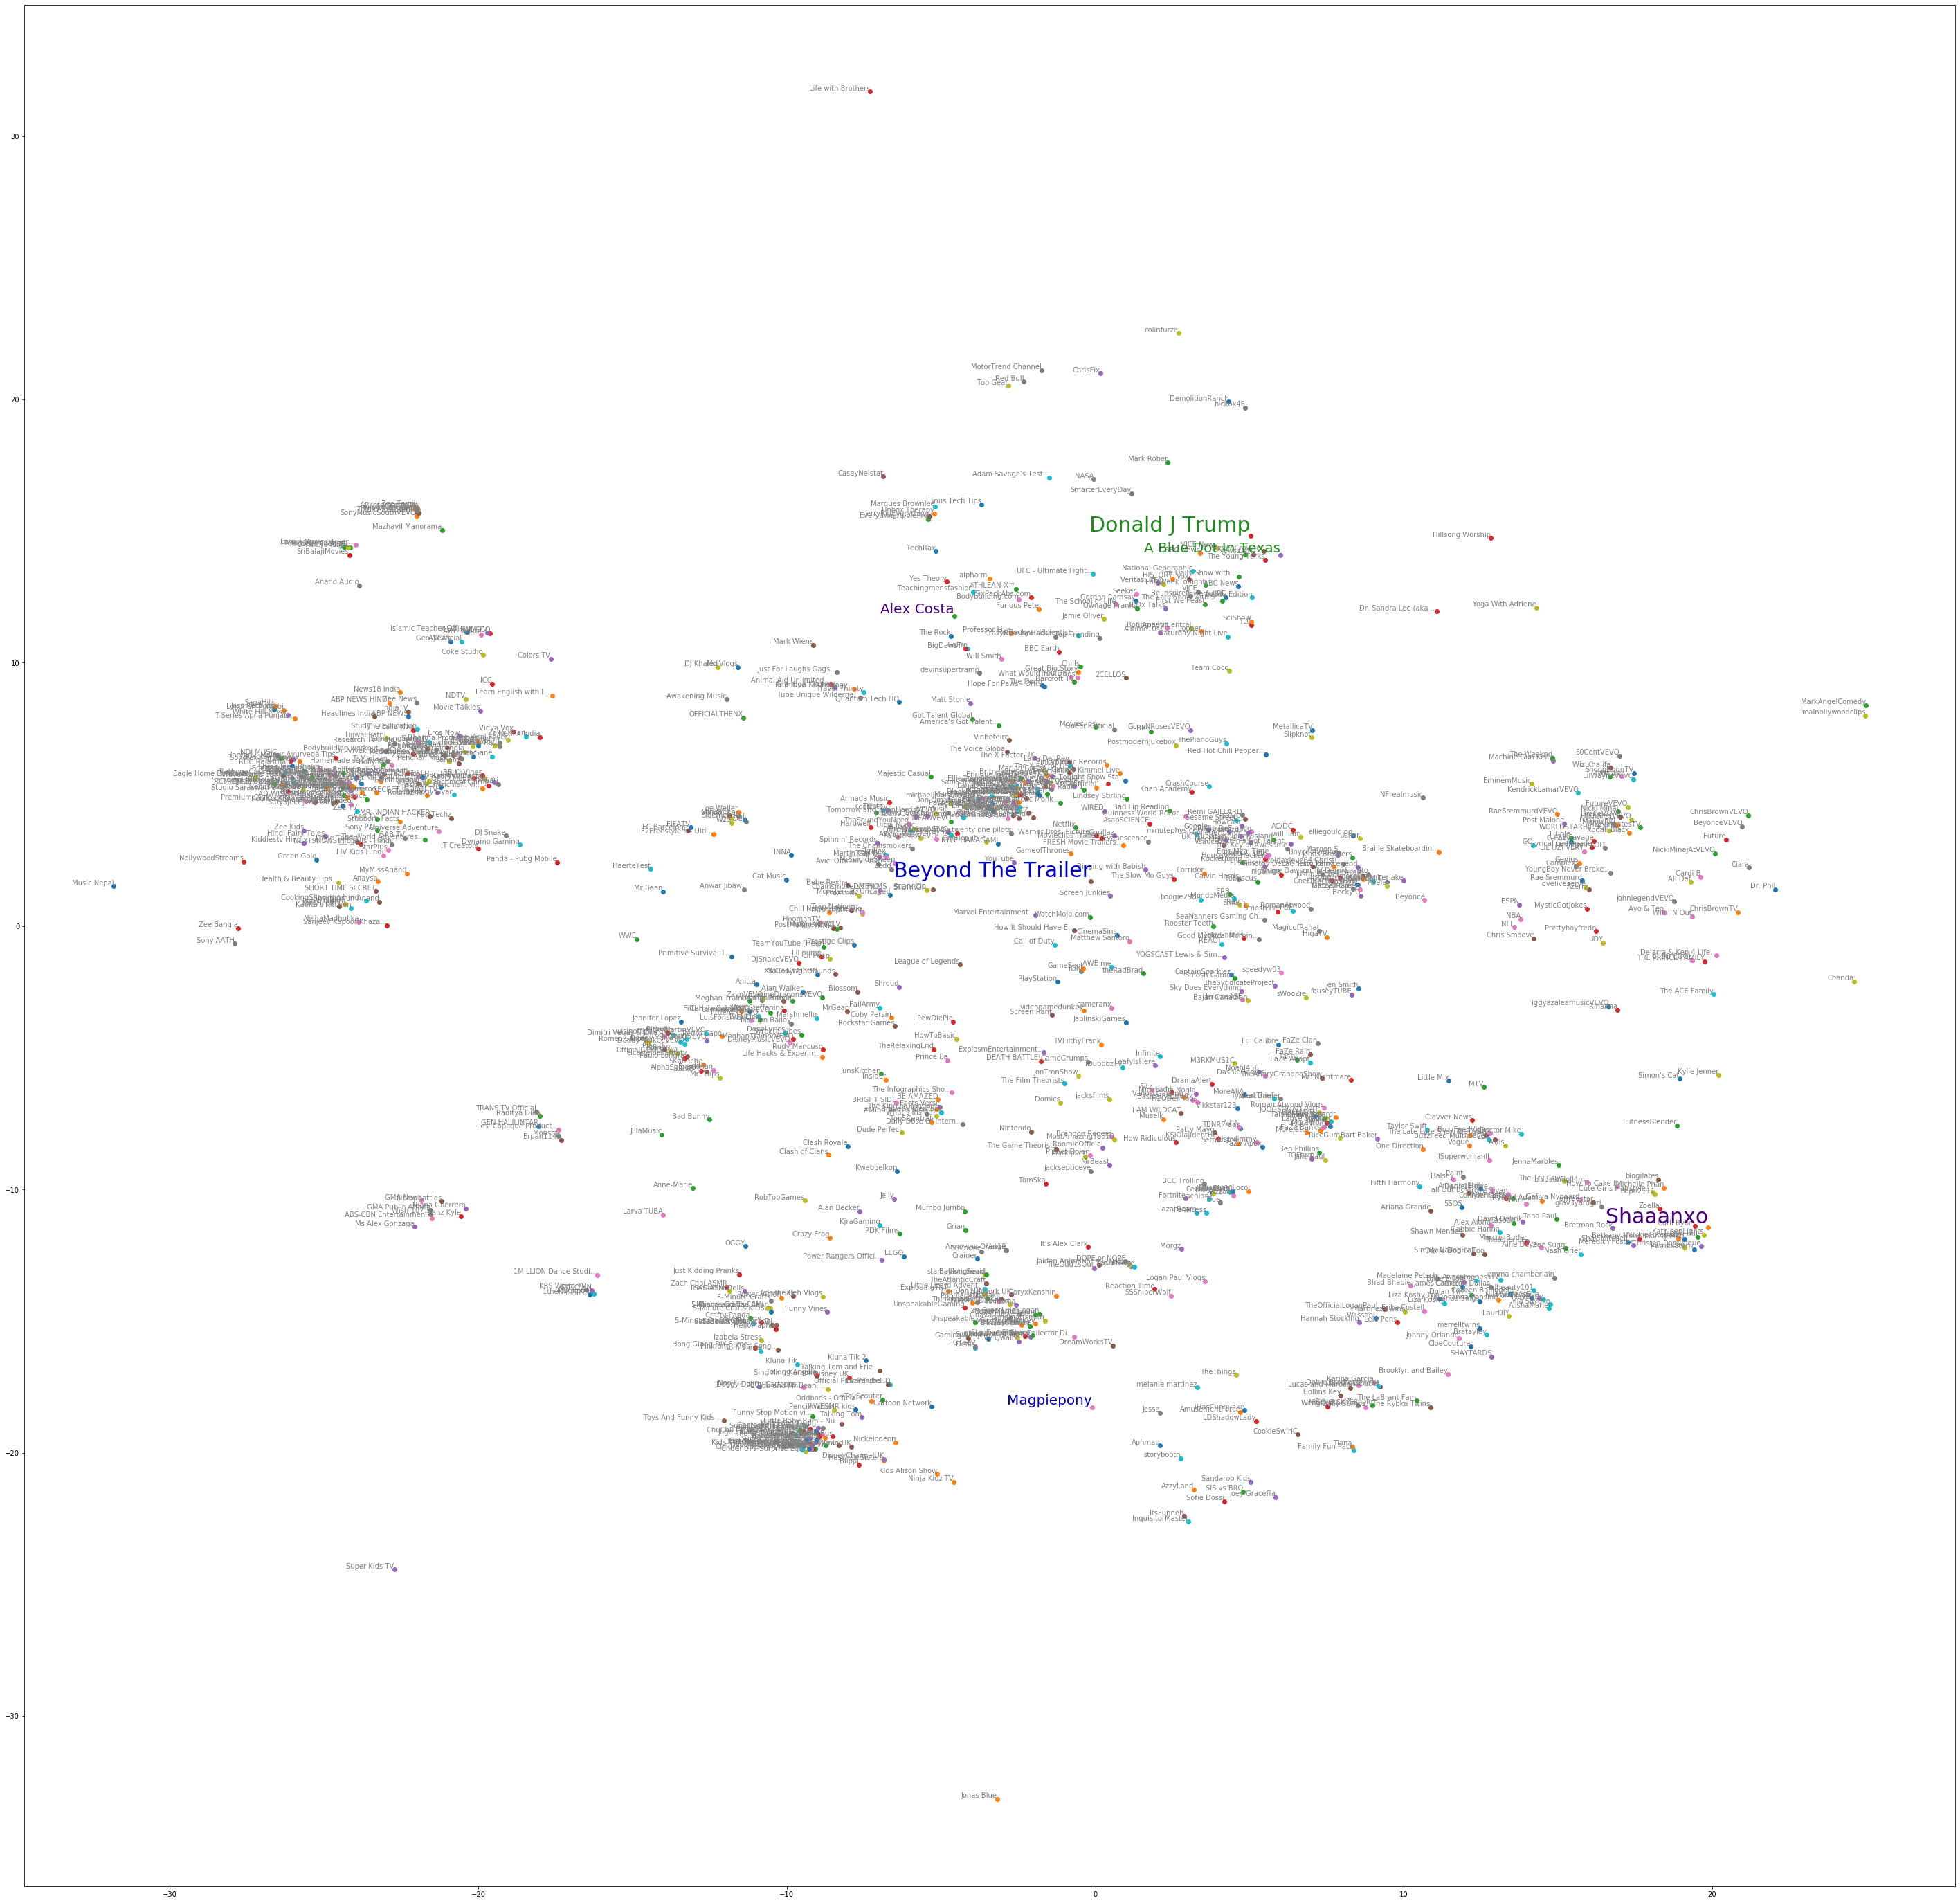

In [28]:

############ VISUALIZING ############
x, y = [], []
annotations = []
for idx, coord in enumerate(tsne):
    # print(coord)
    annotations.append(ix_to_word[idx])
    x.append(coord[0])
    y.append(coord[1])
    
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_4000k_subs.pkl",'rb') as f:
     test_words = pickle.load(f)
f.close()
extended = ['UCMpOz2KEfkSdd5JeIJh_fxw', 'UCZyCposXwcyopaACep44maQ', 'UCAql2DyGU2un1Ei2nMYsqOA', 'UC9pXxdNqCc2zjgRXSoowNNg', 'UCAXR2zenCwvRIyQd9ydtfaA', 'UCISF5OGuAtSLNF24TKTnXag']

#with open("/dlabdata1/youtube_large/jouven/channels_more_300/embedding_pairs.pkl",'rb') as f:
#    extended = pickle.load(f)
#f.close()
test_words += extended

colors = ['indigo', 'forestgreen', 'mediumblue', 'orangered', 'dodgerblue', 'brown', 'deepskyblue', 'crimson', 'black', 'tan']
plt.figure(figsize = (50, 50))
for i in range(len(test_words)):
    word = ix_to_word[dict_channel_ind[test_words[i]]]
    vocab_idx = word_to_ix[word]
    plt.scatter(x[vocab_idx], y[vocab_idx])
    if test_words[i] in extended:
        index = extended.index(test_words[i])
        if index % 2:
            plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', fontsize = 20, color = colors[int(index/2)])
        else:
            plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', fontsize = 30, color = colors[int(index/2)])
    else:
        plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', color = 'gray')
#plt.savefig("/home/jouven/youtube_projects/w2v.png")
plt.show()

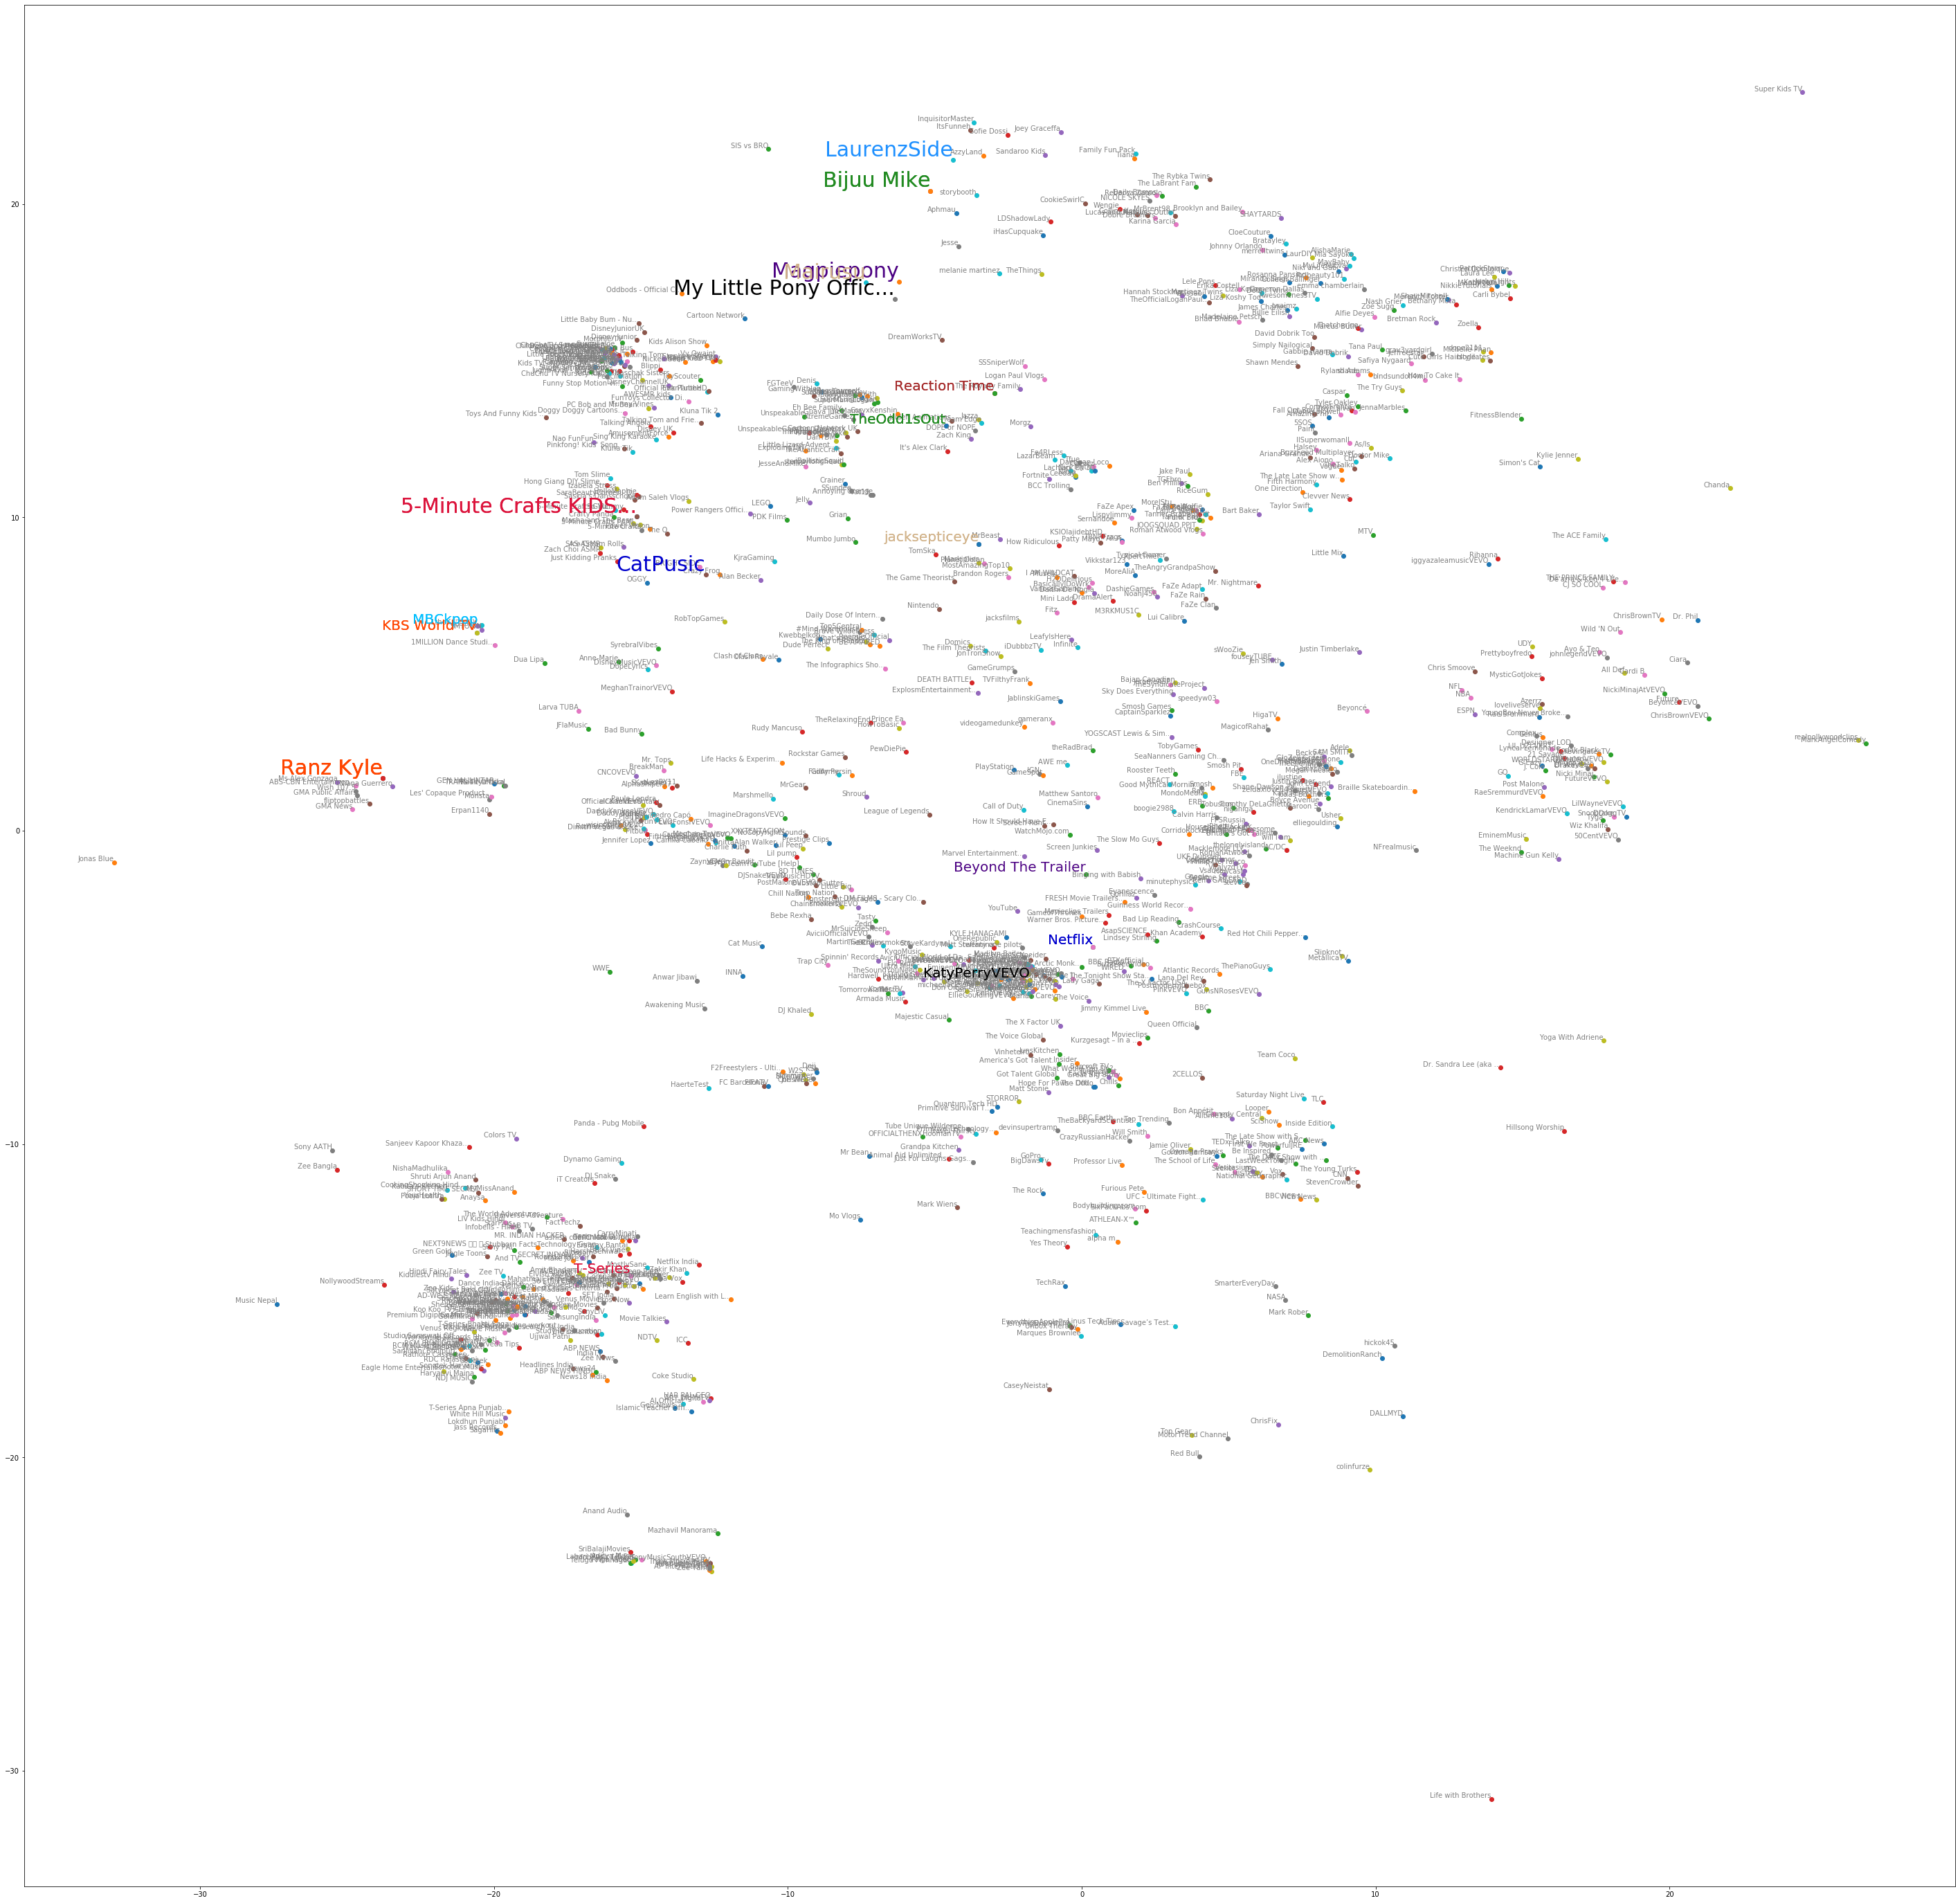

In [72]:

############ VISUALIZING ############
x, y = [], []
annotations = []
for idx, coord in enumerate(tsne):
    # print(coord)
    annotations.append(ix_to_word[idx])
    x.append(coord[0])
    y.append(coord[1])
    
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_4000k_subs.pkl",'rb') as f:
     test_words = pickle.load(f)
f.close()
#extended = ['UCMpOz2KEfkSdd5JeIJh_fxw', 'UCZyCposXwcyopaACep44maQ', 'UCAql2DyGU2un1Ei2nMYsqOA', 'UC9pXxdNqCc2zjgRXSoowNNg', 'UCAXR2zenCwvRIyQd9ydtfaA', 'UCISF5OGuAtSLNF24TKTnXag']

with open("/dlabdata1/youtube_large/jouven/channels_more_300/embedding_pairs.pkl",'rb') as f:
    extended = pickle.load(f)
f.close()
test_words += extended

colors = ['indigo', 'forestgreen', 'mediumblue', 'orangered', 'dodgerblue', 'brown', 'deepskyblue', 'crimson', 'black', 'tan']
plt.figure(figsize = (50, 50))
for i in range(len(test_words)):
    word = ix_to_word[dict_channel_ind[test_words[i]]]
    vocab_idx = word_to_ix[word]
    plt.scatter(x[vocab_idx], y[vocab_idx])
    if test_words[i] in extended:
        index = extended.index(test_words[i])
        if index % 2:
            plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', fontsize = 20, color = colors[int(index/2)])
        else:
            plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', fontsize = 30, color = colors[int(index/2)])
    else:
        plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
            ha='right',va='bottom', color = 'gray')
#plt.savefig("/home/jouven/youtube_projects/w2v.png")
plt.show()

Plot to visualize the embeddingg in 2D.
The channels appearing in the plot are the channels having more than 4000k subsribers. In addition, we have 20 colored channels representing the selected pairs in the "axis projection process". 
The seed pair is in violet. 
For every pair of selected channels: the first channel of this tuple has a lower size compared to the second one.

The pairs represented on the plot corresponds to the seed pair: (Beyond the trailer, Magpiepony) representing the kids vs adult axis.

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 53748 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47673 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from c

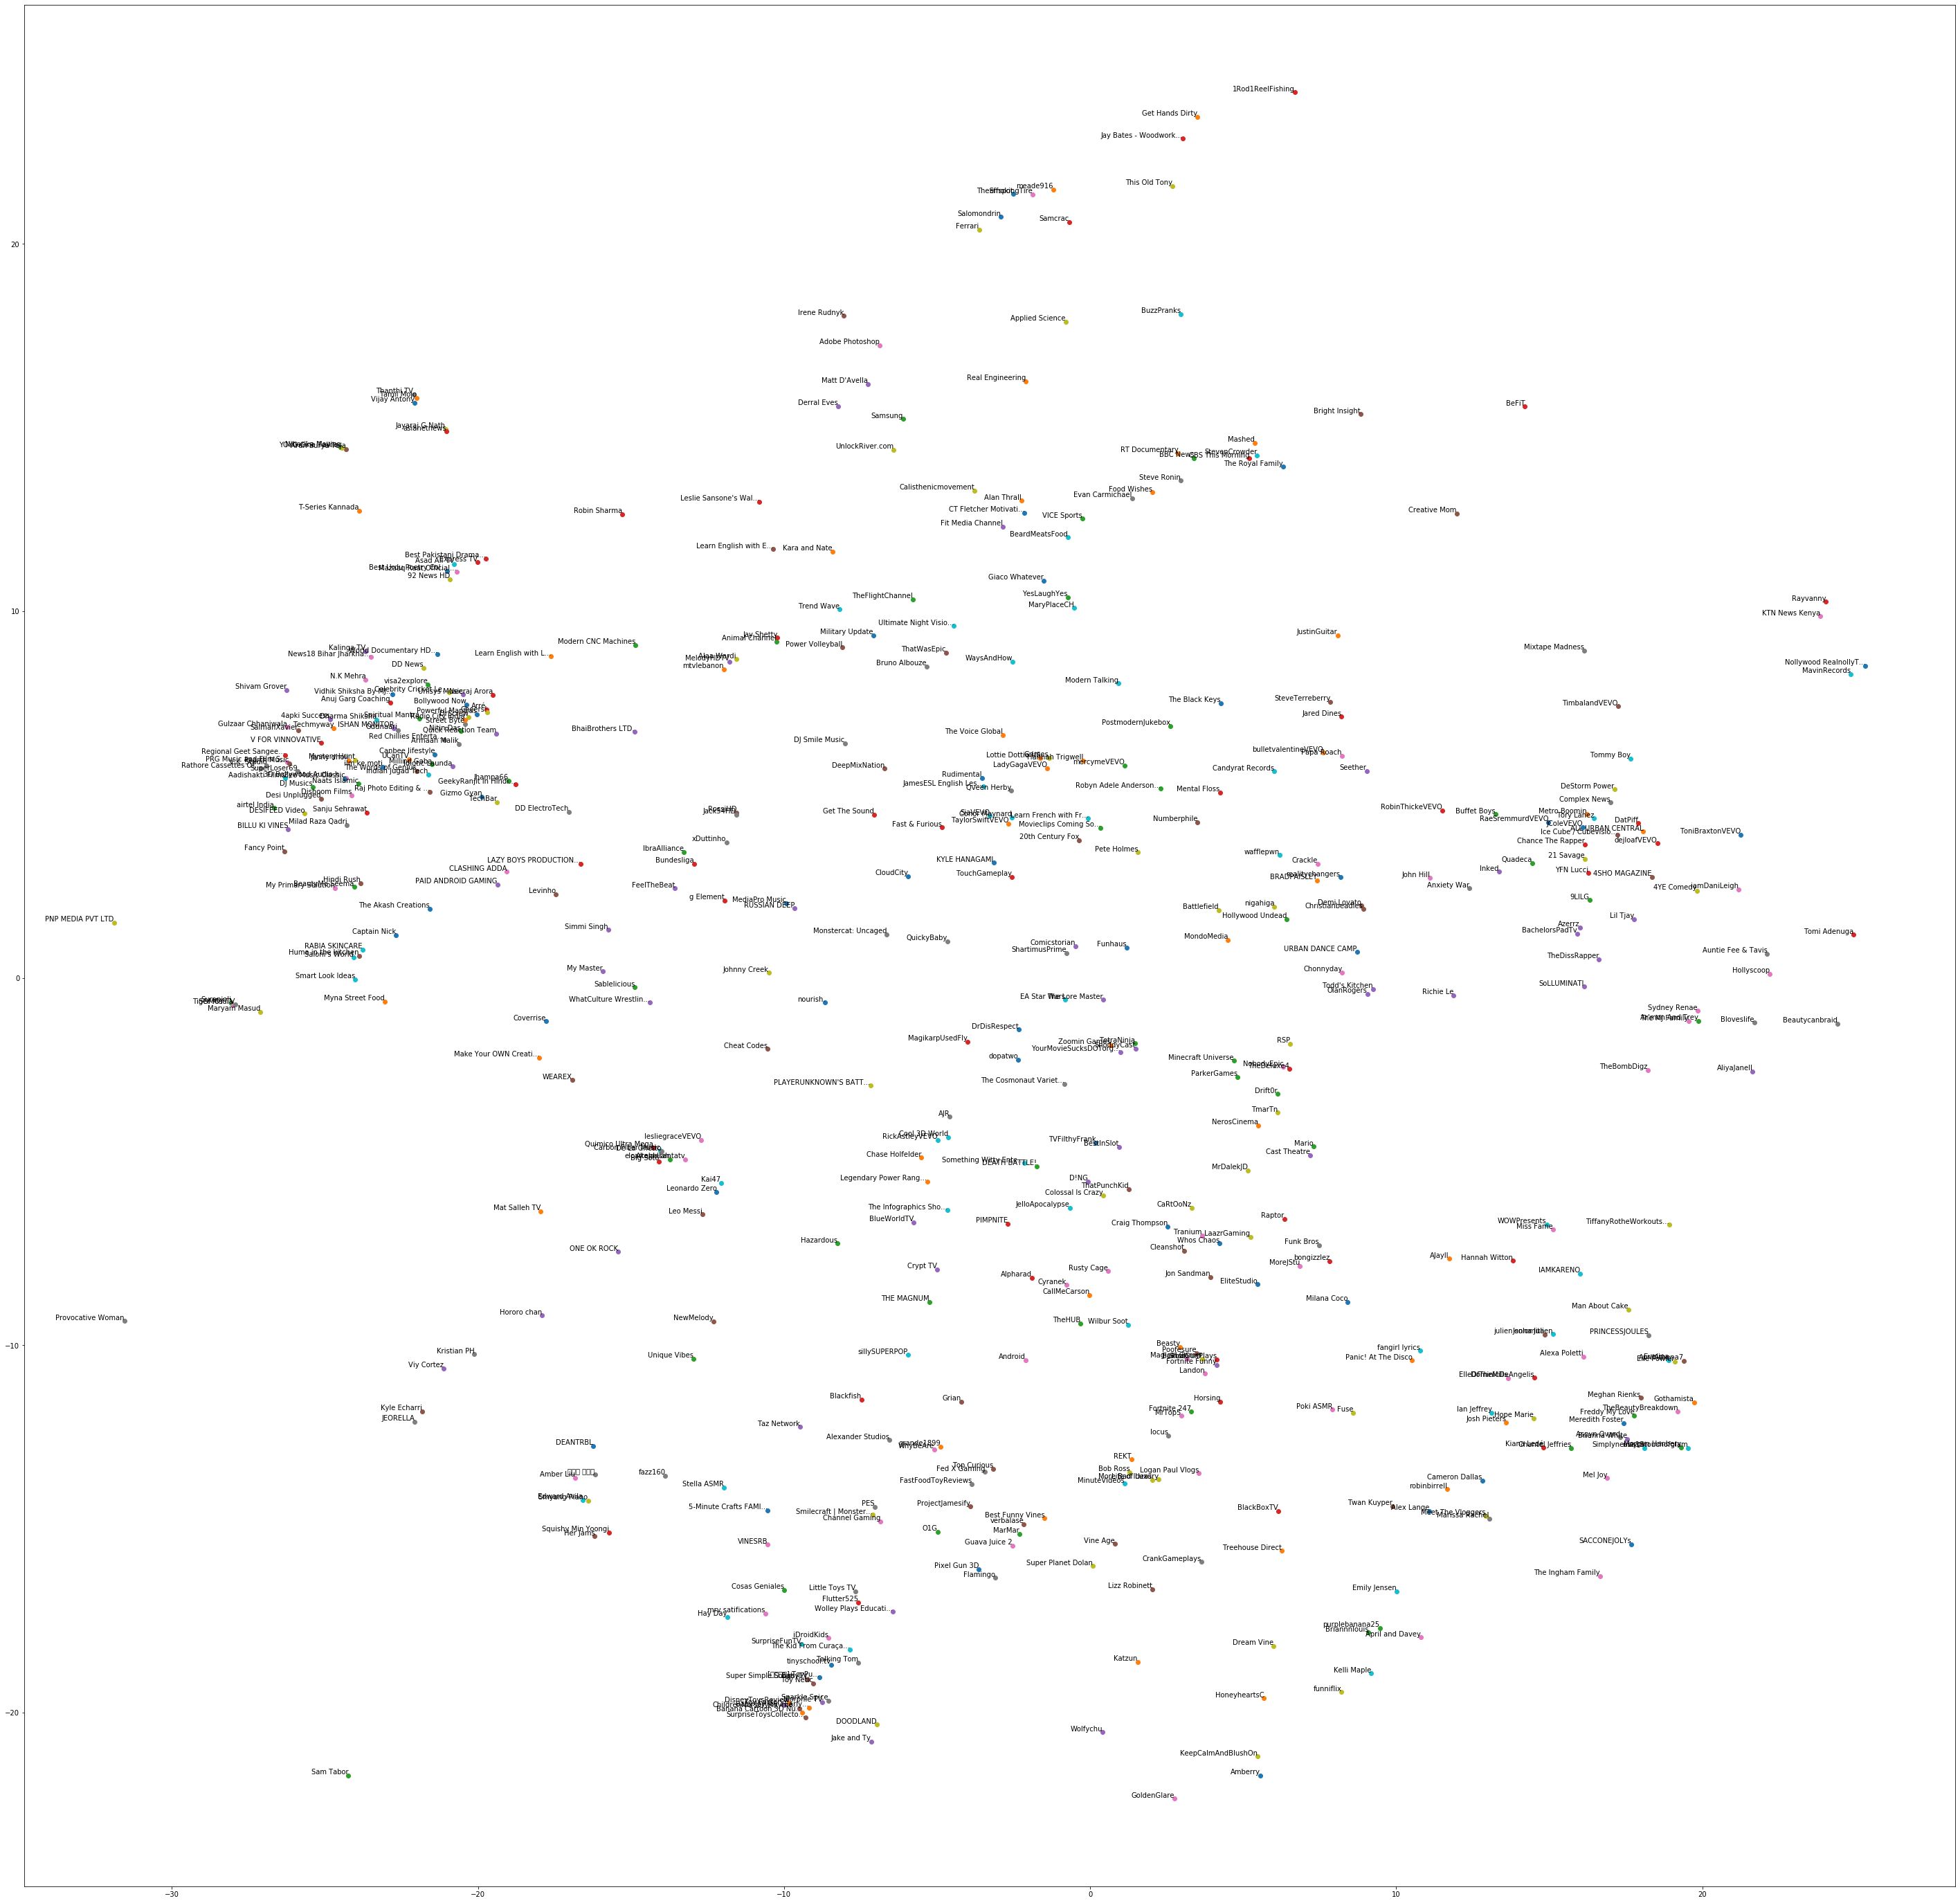

In [27]:
############ VISUALIZING ############
SAMPLES = 500
x, y = [], []
annotations = []
for idx, coord in enumerate(tsne):
    # print(coord)
    annotations.append(ix_to_word[idx])
    x.append(coord[0])
    y.append(coord[1])

test_words = [dict_ind_channel[channel] for channel in random.sample(range(len(channels_id)), SAMPLES)]
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_500k_subs.pkl",'rb') as f:
     test_words = pickle.load(f)
f.close()
test_words = random.sample(test_words, SAMPLES)
plt.figure(figsize = (50, 50))
for i in range(len(test_words)):
    word = ix_to_word[dict_channel_ind[test_words[i]]]
    vocab_idx = word_to_ix[word]
    plt.scatter(x[vocab_idx], y[vocab_idx])
    
    plt.annotate(word, xy = (x[vocab_idx], y[vocab_idx]), \
        ha='right',va='bottom')
#plt.savefig("/home/jouven/youtube_projects/w2v.png")
plt.show()